In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit

In [7]:
input_frame = pd.read_csv("E1-3.2.csv")
# xi = x / (lambda * z)
input_frame["xi"]=input_frame["x"]/0.25
input_frame["tplxi"] = input_frame["xi"] * 2 * np.pi * 500e-9
input_frame

,x,Amplitude,xi,tplxi
0,-400000.000000,0.006700,-1.600000e+06,-5.026548
1,-399919.991999,0.006659,-1.599680e+06,-5.025543
2,-399839.983998,0.006619,-1.599360e+06,-5.024537
3,-399759.975998,0.006578,-1.599040e+06,-5.023532
4,-399679.967997,0.006538,-1.598720e+06,-5.022527
...,...,...,...,...
9995,399679.967997,0.006538,1.598720e+06,5.022527
9996,399759.975998,0.006578,1.599040e+06,5.023532
9997,399839.983998,0.006619,1.599360e+06,5.024537
9998,399919.991999,0.006659,1.599680e+06,5.025543


In [8]:
def func(tpxi, a0, a1, a2, a3, a4):
    return 0.5 * a0 + a1 * np.cos(tpxi) + a2 * np.cos(2*tpxi) + a3 * np.cos(3*tpxi) + a4 * np.cos(4*tpxi)

In [11]:
popt, pcov = curve_fit(func, input_frame["tplxi"], input_frame["Amplitude"])
A0, A1, A2, A3, A4 = popt
popt

array([0.39717315, 0.32141899, 0.2469448 , 0.15784402, 0.06253747])

In [10]:
x = np.linspace(-400000, 400000, 10000)
y = np.array([])
for x_val in tqdm(x):
    y = np.append(y, func(x * 2 * np.pi * 500e-9 / 0.25, A0, A1, A2, A3, A4))
y

 10%|▉         | 981/10000 [00:15<02:25, 61.92it/s]


KeyboardInterrupt: 

([<matplotlib.axis.YTick at 0x1821553cf98>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

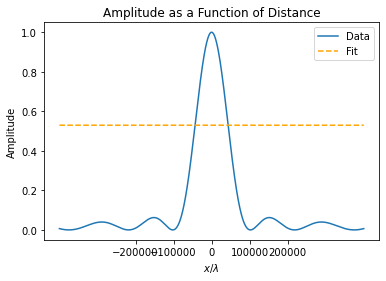

In [ ]:
plt.plot(input_frame["x"], input_frame["Amplitude"], label = "Data")
plt.plot(x, y, color = "orange", linestyle = "dashed", label = "Fit")
plt.xlabel("$x/\\lambda$")
plt.ylabel("Amplitude")
plt.title("Amplitude as a Function of Distance")
plt.legend()
plt.xticks(np.arange(-400000,400001,200000))
plt.yticks(np.linspace(0,1,6))

([<matplotlib.axis.YTick at 0x182155adeb8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

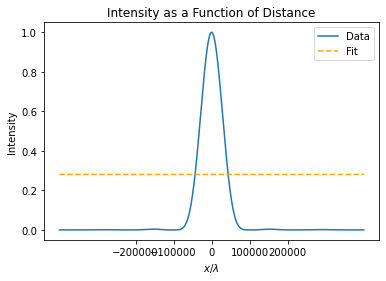

In [ ]:
plt.plot(input_frame["x"], input_frame["Amplitude"]**2, label = "Data")
plt.plot(x, y**2, color = "orange", linestyle = "dashed", label = "Fit")
plt.xlabel("$x/\\lambda$")
plt.ylabel("Intensity")
plt.title("Intensity as a Function of Distance")
plt.legend()
plt.xticks(np.arange(-400000,400001,200000))
plt.yticks(np.linspace(0,1,6))

([<matplotlib.axis.YTick at 0x1821662e710>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

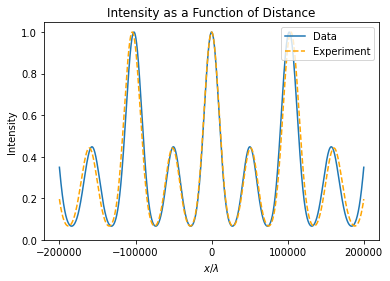

In [ ]:
data = pd.read_csv("E1-3.2.csv")
experiment = pd.read_csv("data.csv")
plt.plot(data["x"], data["Amplitude"]**2, label = "Data")
plt.plot(experiment["x"], experiment["Amplitude"]**2, color = "orange", linestyle = "dashed", label = "Experiment")
plt.xlabel("$x/\\lambda$")
plt.ylabel("Intensity")
plt.title("Intensity as a Function of Distance")
plt.legend(loc = "upper right")
plt.xticks(np.arange(-400000,400001,200000))
plt.yticks(np.linspace(0,1,6))